In [1]:
!pip install pandas matplotlib seaborn scikit-learn


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("Churn_Modelling.csv")
df.head()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
df.shape
df.columns
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)


In [9]:
df.isnull().sum()


CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [11]:
df = pd.get_dummies(df, columns=['Geography'], drop_first=True)

df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})


In [13]:
X = df.drop('Exited', axis=1)
y = df['Exited']


In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [17]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [26]:
from sklearn.metrics import accuracy_score, confusion_matrix

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:")
confusion_matrix(y_test, y_pred)


Accuracy: 0.7845
Confusion Matrix:


array([[1371,  236],
       [ 195,  198]], dtype=int64)

In [28]:
feature_importance = pd.Series(
    model.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

feature_importance


Age                  0.223226
Balance              0.153724
EstimatedSalary      0.153710
CreditScore          0.143762
NumOfProducts        0.119747
Tenure               0.076504
IsActiveMember       0.068282
Geography_Germany    0.022055
Gender               0.014296
Geography_Spain      0.013140
HasCrCard            0.011554
dtype: float64

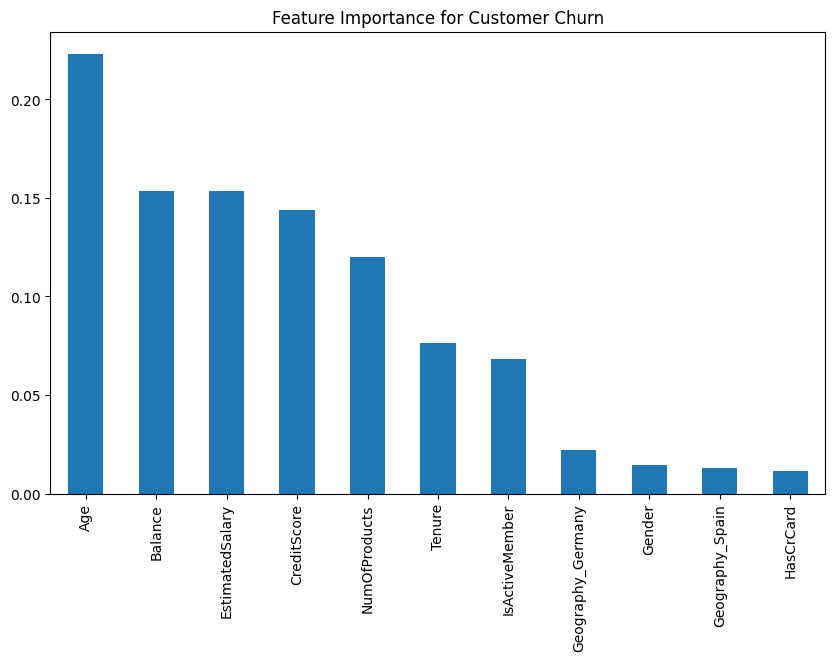

In [30]:
plt.figure(figsize=(10,6))
feature_importance.plot(kind='bar')
plt.title("Feature Importance for Customer Churn")
plt.show()


## Conclusion

A Decision Tree classifier was trained to predict customer churn.
Feature importance analysis showed that factors such as balance,
age, and geography play a major role in customer churn decisions.
